# Continuous Control

## Load environment

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import matplotlib.pyplot as plt
from train import do_episode

In [2]:

path_to_reacher = 'ReacherOne/Reacher.x86_64'
env = UnityEnvironment(file_name=path_to_reacher, no_graphics=False)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Examine the State and Action Spaces

In [3]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### Run experiment with agent

/home/jorge/miniconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Average score: 37.6200 over 1 episodes.


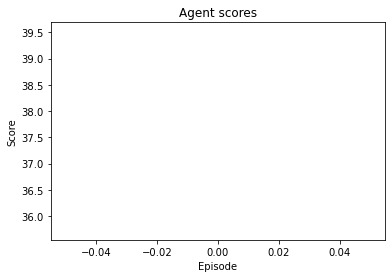

In [4]:
from os import environ


agent = torch.load('agents/DDPGAgent-1ez6us1k.pt')

episodes = 1
scores = np.zeros(episodes) 

for i in range(episodes):
    episode_score = 0
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    next_action = agent.start(state)

    while not env_info.local_done[0]:
        # Take a step from the agent
        reward = env_info.rewards[0]
        episode_score += reward
        state = env_info.vector_observations[0]

        next_action = agent.step(state, reward, learn=False)

        # Perform action
        env_info = env.step(next_action)[brain_name]

    # Last reward
    episode_score += env_info.rewards[0]
    agent.end(env_info.rewards[0])

    scores[i] = episode_score
    
print(f'Average score: {np.mean(scores):.4f} over {episodes} episodes.')

plt.plot(scores)
plt.title('Agent scores')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()

In [5]:
env.close()